In [1]:
from darkflow.net.build import TFNet
import os, sys
from os.path import join
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [3]:
pwd = os.getcwd()
imgdir = join(pwd, './test_images/')
loaddir = join(pwd, './built_graph/')
files = os.listdir(loaddir)
pbfile = ''
metafile = ''
for file in files:
    if file.endswith('pb'):
        pbfile = join(loaddir, file)
        pass
    elif file.endswith('meta'):
        metafile = join(loaddir, file)
        pass
    pass
print(pbfile, metafile)

E:\Projects\Localizer\./built_graph/yolov2-custom.pb E:\Projects\Localizer\./built_graph/yolov2-custom.meta


In [4]:
options = {
    'pbLoad': pbfile,
    'metaLoad': metafile,
    'threshold': .3,
    'gpu': 1.0,
}

In [5]:
model = None
if (not pbfile is None) and (not metafile is None):
    model = TFNet(options)


Loading from .pb and .meta
Instructions for updating:
Use tf.gfile.GFile.
GPU mode with 1.0 usage


In [6]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > options['threshold']:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

1.PNG


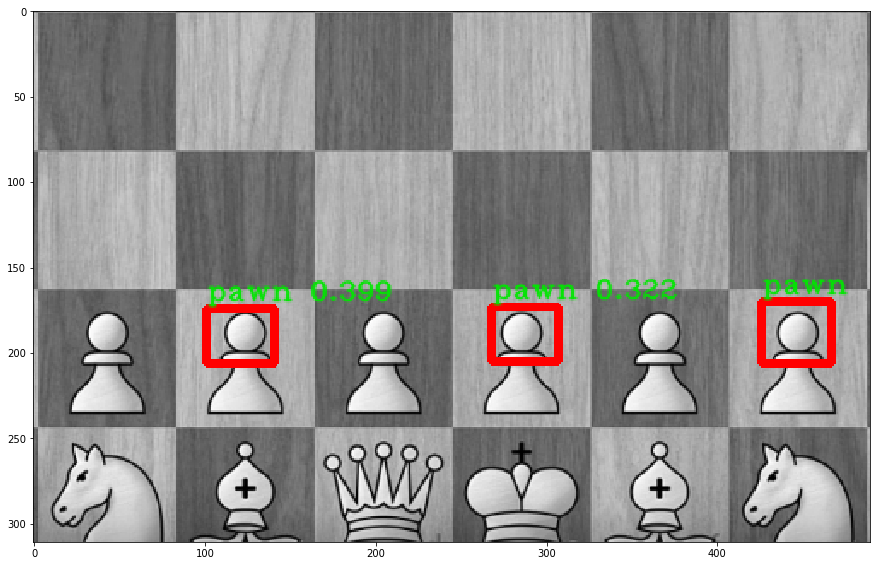

In [7]:
for file in os.listdir(imgdir):
    print(file)
    img = cv2.imread(join(imgdir, file))
    results = model.return_predict(img)
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(boxing(img, results))